<a href="https://colab.research.google.com/github/mihakodric/Dinamika/blob/main/Vaja_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vaja 11: Lastna dušena nihanja



# Naloga 1
Na sliki je prikazana tovorna tehtnica s premično ploščo mase $m_p$, dvema vzmetema togosti $k$ in dušilko s koeficientom dušenja $d$. Za tehtnico na sliki določite:
 - lastno nedušeno krožno frekvenco $\omega_0$,
 - razmernik dušenja $\delta$.
Kakšna je lastna krožna frekvenca $\omega_{0,t}$, če je na tehtnici tovornjak mase $m_t$? Kakšna je tedaj dušena lastna krožna frekvenca $\omega_{0d,t}$? Privzemite, da se tehtnica lahko premika samo v vertikalni smeri.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mp = 25*10**3
mt = 10*10**3
k = 400*10**3
d = 50*10**3

omega0 = np.sqrt((2*k) / (mp))
delta = d / (2*omega0*mp)
omega0, delta

(5.656854249492381, 0.17677669529663687)

In [5]:
omega0 = np.sqrt((2*k) / (mp+mt))
delta = d / (2*omega0*(mp+mt))
omega0d = omega0 * np.sqrt(1-delta**2)
omega0, delta, omega0d

(4.780914437337574, 0.14940357616679922, 4.727254887935513)

# Naloga 2
Na sliki je masa v obliki črke T, ki je eden od elementov med menjalnikom in prestavno ročico avtomobila ter zagotavlja bolj udobno prestavljanje.
 - Izračunajte lastno nedušeno $\omega_0$ in lastno dušeno $\omega_{0d}$ krožno frekvenco sistema, če je masa vpeta kot je prikazano na sliki.
 - Kakšna mora biti togost vzmeti $k_z$, da je lastna nedušena krožna frekvenca $\omega_0$ enaka $n_z=6000$ obr/min? Za koliko odstotkov je v tem primeru $\omega_{0d,z}$ manjša od $\omega_{0,z}$?
Pri reševanju zanemarite vpliv težnosti ter predpostavite majhne premike.

In [8]:
k = 100*10**3
d = 10
JA = 0.003
a = 0.06
nz = 6000

omega0 = np.sqrt((k*a**2) / (JA))
delta = (d*a**2) / (2*omega0*JA)
omega0d = omega0 * np.sqrt(1-delta**2)
omega0, delta, omega0d

(346.41016151377545, 0.017320508075688773, 346.3581960918494)

In [9]:
omega0z = nz*2*np.pi / 60

kz = omega0z**2 * JA / a**2
deltaz = (d * a**2) / (2 * omega0z * JA)
omega0dz = omega0z * np.sqrt(1-deltaz**2)

omega0z, deltaz, omega0dz

(628.3185307179587, 0.009549296585513718, 628.2898821750788)

# Naloga 3
S kolegi ste se odločili ustanoviti podjetje za izdelavo odskočnih desk za skoke v vodo. Domnevate, da je za sistem vzmet-deska optimalno, če je lastna frekvenca usklajena s trajanjem odskoka ($T/2$), tako da velja $\omega_0=2\pi/T$.

 - Če najprej dušenje zanemarite, potem določite potrebno togost vzmeti $k$, da bo lastna frekvenca sistema vzmet-deska znašala $\omega_0$.
 - Ko imate znano togost $k$ določite tak razmernik dušenja $\delta$, da se bo amplituda nihanja po odskoku skakalca (sistem deska-vzmet-dušilka) v času $2T$ zmanjšala na desetino začetne vrednosti.

Zanemarite vpliv težnosti.

In [30]:
# predpostavimo podatke
l = 2
m = 25
T = 0.2
t_ = 2*T

omega0 = (2*np.pi) / T
JA = 1/3 * m * l**2

k = JA * omega0**2
k

32898.681336964524

In [31]:
n = t_/T
delta = np.log(10/1) / (2*np.pi*n)
delta

0.18323389971985696

In [32]:
delta =  np.log(10/1) / (omega0*t_)
delta

0.18323389971985696

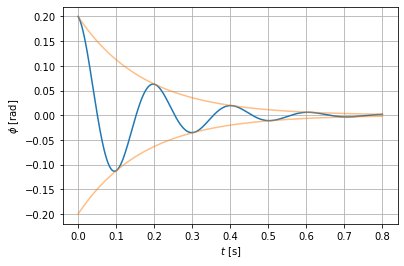

In [41]:
# prepis zasuka v odvisnosti od časa:
# predpostavimo začetne pogoje:
# phi(t=0)=phi0
# phi'(t=0)=0

phi0 = 0.2

def ovojnica(t):
  return np.exp(-delta*omega0*t)*phi0

def phi(t):
  omega0d = omega0*np.sqrt(1-delta**2)
  return ovojnica(t)*np.cos(omega0d*t)

t = np.linspace(0, t_*2, 1000)

plt.plot(t, phi(t))
plt.plot(t, ovojnica(t), "C1", alpha = 0.5)
plt.plot(t, -ovojnica(t), "C1", alpha = 0.5)
plt.xlabel("$t$ [s]")
plt.ylabel("$\phi$ [rad]")
plt.grid();